## 3.4.4 Guided example + challenge
In this notebook, I am going to try and improve an svc model

In [101]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
raw_data = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\3.4.4 data\r.csv')

In [3]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

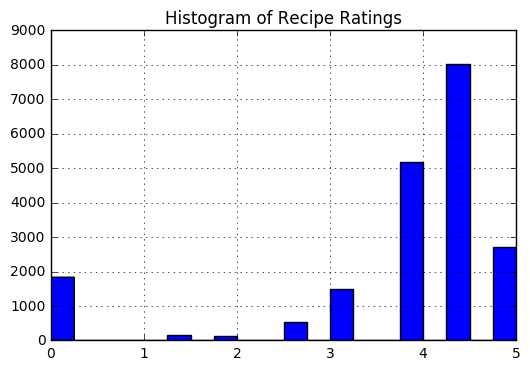

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
svr.score(X, Y)

0.038565706512988962

In [10]:
cross_val_score(svr, X, Y, cv=5)

array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])

## bias in rating recipes

1. As stated in the test, people who are looking for specific types of recipes (desserts over entrees) are more likely to give positive ratings based on emotions.
2. People are much more likely to rate on the ends of the scale, because people who do not feel strongly either way are more likely to not give any feedback at all.
3. People pick recipes they know they are more likely to enjoy. If 50% of people like a certain dish, the positive-negative feedback will be well above 50% because the people who do not think they will like it won't give it a chance in the first place.

In [11]:
A = X.groupby('yogurt').count()
A

,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,...,wok,yellow squash,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
yogurt,,,,,,,,,,,,,,,,,,,,,
0.0,19524,19524,19524,19524,19524,19524,19524,19524,19524,19524,...,19524,19524,19524,19524,19524,19524,19524,19524,19524,19524
1.0,528,528,528,528,528,528,528,528,528,528,...,528,528,528,528,528,528,528,528,528,528


In [96]:
#all of the data after the columns with null values looks like this. around 20 thousand
#zeros with a few recipes that actually use the ingredients. Most of the columns won't have 
#enough values to actually build a regression on. Let's stick to fat, calories, protein and sodium since they are
#actual measurements with potential values. 
new_data = raw_data.dropna(how='any',axis=0)
new_data

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,"Yams Braised with Cream, Rosemary and Nutmeg",3.750,256.0,4.0,5.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Banana-Chocolate Chip Cake With Peanut Butter ...,4.375,766.0,12.0,48.0,439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,Beef Tenderloin with Garlic and Brandy,4.375,174.0,11.0,12.0,176.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#redefining the model to fit to our new data
svr = SVR()
X2 = new_data.iloc[:,2:6]
Y2 = new_data.rating
svr.fit(X2,Y2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
#a much better score, but still not ideal
svr.score(X2, Y2)

0.56708956908044383

In [92]:
#Lets try adding the removed columns back in to the training set, but with a modification. 
#I will leave columns in the set based on how many recepies actually use the ingrediants
#p holds these values
p = [500, 1000, 2500, 5000]
for x in p:
    #selecting only the ingredients as categories and replacing 0s with Nan
    a = new_data.iloc[:,6:].replace(0, np.nan)
    #dropping all columns with less than the threshold of 1s
    a = a.dropna(axis=1, thresh=x)
    #putting the 0s back in
    a = a.fillna(0)
    #adding the other data back to the set
    a = X2.join(a)
    a = a.join(raw_data['rating'])
    svr = SVR()
    X = a.drop(['rating'], 1)
    Y = a.rating
    svr.fit(X,Y)
    #printing the score for every threshold
    print(x, svr.score(X, Y))

500 0.437221789855
1000 0.492316708279
2500 0.543127769704
5000 0.562349771848


In [93]:
#unfortunately, the best model is the one without any of the ingredient data so lets try to improve
#the model in another way. If we turn the rating into a boolean for good and bad, that might improve
#the model
new_data.rating.describe()

count    15864.000000
mean         3.760952
std          1.285518
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [97]:
#we will set the line for good at the median since the data is so heavily skewed towards the top
new_data['rating']  = np.where(new_data['rating'] >= 3.77,1,0)

C:\Users\jmfra\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [116]:
start_time = time.time()
p = [500, 1000, 2500, 5000]
for x in p:
    a = new_data.iloc[:,6:].replace(0, np.nan)
    a = a.dropna(axis=1, thresh=x)
    a = a.fillna(0)
    a = X2.join(a)
    a = a.join(new_data['rating'])
    svr = SVR()
    X = a.drop(['rating'], 1)
    Y = a.rating
    svr.fit(X,Y)
    print(x, svr.score(X, Y))
print("--- %s seconds ---" % (time.time() - start_time))

500 0.865253200183
1000 0.909866537789
2500 0.935837445098
5000 0.942822818315
--- 855.5561726093292 seconds ---


In [114]:
svr = SVR()
X2 = new_data.iloc[:,2:6]
Y2 = new_data.rating
svr.fit(X2,Y2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [115]:
svr.score(X2, Y2)

0.94495983441910536

These models are much better with almost double the accuracy. This makes sense becasue if you dont split the model into categories, the trained predictor could guess a rating of 3.5 for one that actually got 3.75. In our case that would be considered wrong, even though it is close enough. With this form of the model, it only predicts above or below a value. I would guess that if we can add a modifier to the original SVC that made it classify a guess as correct if it was within a score of .5 or some predetermined amount, the accuracy would be close to the boolean accuracy.